In [2]:
import keras.datasets

Using TensorFlow backend.


In [3]:
import keras.datasets.cifar10 as ci
import numpy as np


In [19]:
(x_train, y_train), (x_test, y_test)=ci.load_data()

In [5]:
import matplotlib.pyplot as plt

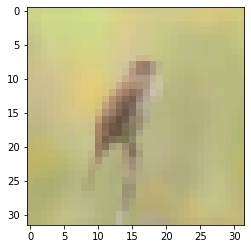

In [6]:
plt.imshow(x_train[2543])

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
import pandas as pd

In [9]:
labels=pd.read_csv("cifar10_labels.csv")

In [10]:
a=labels.columns
a=pd.DataFrame(data=a)
labels=a

In [58]:
#converting pandas dataframe into list objects
names=[]
for i in labels.values:
    names.append(list(i))
categories=[]
for i in range(len(names)):
    categories.append(names[i][0])

In [11]:
import keras as ke
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [12]:
x_train[0].max()

255

In [13]:
x_train=x_train/255.0
x_test=x_test/255.0

In [14]:
#one hot encoding the labels
#oe=OneHotEncoder()
#y_train=oe.fit_transform(y_train).toarray()
#y_test=oe.fit_transform(y_test).toarray()


In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
#importing models

from keras.models import Sequential
from keras.layers import  Dense,Activation,Flatten,Conv2D,MaxPooling2D,Dropout

In [21]:
#Building the moodel

model=Sequential()
model.add(Conv2D(64, (3,3) ,input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))



model.add(Flatten())
model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))



model.add(Dense(10))
model.add(Activation("sigmoid"))

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(x_train,y_train,epochs=10,batch_size=60)


Epoch 1/10
50000/50000 [==============================] - 126s 3ms/step - loss: 2.0288 - accuracy: 0.2131
Epoch 2/10
50000/50000 [==============================] - 131s 3ms/step - loss: 1.4999 - accuracy: 0.4308
Epoch 3/10
50000/50000 [==============================] - 140s 3ms/step - loss: 1.2817 - accuracy: 0.5329: 36s - loss: 1.2896 - accurac
Epoch 4/10
50000/50000 [==============================] - 135s 3ms/step - loss: 1.1667 - accuracy: 0.5786
Epoch 5/10
50000/50000 [==============================] - 148s 3ms/step - loss: 1.0843 - accuracy: 0.6101
Epoch 6/10
50000/50000 [==============================] - 132s 3ms/step - loss: 1.0208 - accuracy: 0.6357
Epoch 7/10
50000/50000 [==============================] - 137s 3ms/step - loss: 0.9680 - accuracy: 0.6597
Epoch 8/10
50000/50000 [==============================] - 123s 2ms/step - loss: 0.9246 - accuracy: 0.6751
Epoch 9/10
50000/50000 [==============================] - 118s 2ms/step - loss: 0.8754 - accuracy: 0.6922
Epoch 10/10
5000

In [22]:
eva=model.evaluate (x_test, y_test)

10000/10000 [==============================] - 8s 834us/step


In [23]:
eva

[1.1155806644439696, 0.6306999921798706]

In [37]:
y_predict=model.predict(x_test)
pred=[]
for i in y_predict:
    pred.append(i.argmax())
pred=np.array(pred)

In [61]:
predictions=[]
for i in range(len(pred)):
    predictions.append(categories[pred[i]])


truck


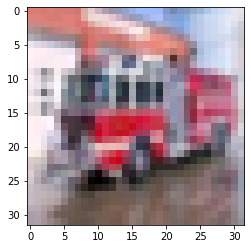

In [68]:
i=38
print(predictions[i])
plt.imshow(x_test[i])